## Feature Selection

This notebook looks at feature correlations and removes any features that are highly correlated

Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pdb
import glob
import matplotlib.pyplot as plt
import os
import shutil

Create the plots folder, or remove it if it exists

In [2]:
try:
    if os.path.exists('plots'):
        shutil.rmtree('plots')
    os.makedirs('plots')
except Exception as e:
    print(e)

Load the data

In [3]:
#load the training data
train_files = glob.glob('feats/train_*.pkl')
train = []
for train_file in train_files:
    train.append(pd.read_pickle(train_file))

train = pd.concat(train)

#load the test data
test_files = glob.glob('feats/test_*.pkl')
test = []
for test_file in test_files:
    test.append(pd.read_pickle(test_file))

test = pd.concat(test)

Look at feature correlations. In this case, there aren't any large correlations so just keep all the data

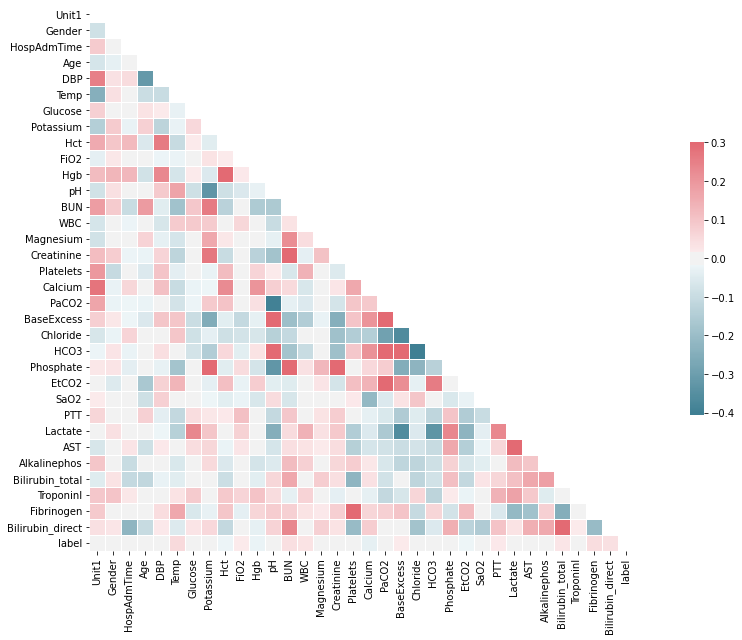

In [4]:
#look at feature correlations
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#make the heatmap plot
plt.figure(figsize=(16,9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.savefig('plots/heatmap.png', dpi=250)
plt.show()

#save the data
train.to_pickle('train.pkl')
test.to_pickle('test.pkl')